These pages explain how to get your Chrome history on your computer:
    
https://superuser.com/questions/602252/can-chrome-browser-history-be-exported-to-an-html-file
    
https://yuji.wordpress.com/2014/03/10/export-chrome-history-as-csv-spreadsheet/

Notebook of Chrome history analysis:

http://www.isabeldalessandro.com/cs234/google/notebook1.html

https://gist.github.com/dropmeaword/9372cbeb29e8390521c2

In [1]:
#!cp /Users/ben/Library/Application Support/Google/Chrome/Default/History .

A good tutorial on how to load SQL into Pandas

https://www.dataquest.io/blog/python-pandas-databases/

The official documentation is

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_sql.html

https://pandas.pydata.org/pandas-docs/stable/io.html#sqlite-fallback

In [2]:
import pandas
import sqlite3
pandas.__version__

'0.23.4'

Google Chrome's timestamp, named "Webkit format", is the number of microseconds since January, 1601

We can use strftime in SQL to get that date:

In [3]:
conn = sqlite3.connect("History")
curr_time = pandas.read_sql_query("SELECT strftime('%s', '1601-01-01 00:00');",conn)
curr_time.iloc[0][0]

'-11644473600'

In [21]:
type(conn)

sqlite3.Connection

In [4]:
conn = sqlite3.connect("History")
hist_df = pandas.read_sql_query("SELECT datetime(last_visit_time/1000000+strftime('%s', '1601-01-01 00:00:00')-(60*60*4),'unixepoch','localtime'), url FROM urls ORDER BY last_visit_time DESC;", conn)
hist_df.columns=['date_time','url']
hist_df.head()

,date_time,url
0,2019-03-12 07:46:52,http://localhost:8888/
1,2019-03-12 07:46:52,http://localhost:8888/lab?
2,2019-03-12 07:44:13,https://umbc-my.sharepoint.com/:p:/r/personal/...
3,2019-03-12 07:44:13,https://umbc-my.sharepoint.com/personal/benpay...
4,2019-03-12 07:44:11,https://www.facebook.com/


In [20]:
hist_df.shape

(13835, 2)

In [5]:
hist_df.tail()

,date_time,url
13830,1600-12-31 20:00:00,https://sites.google.com/site/physicsderivatio...
13831,1600-12-31 20:00:00,https://drive.google.com/drive/u/0/starred
13832,1600-12-31 20:00:00,https://github.com/allofphysicsgraph/proofofco...
13833,1600-12-31 20:00:00,https://old.reddit.com/r/Physics/
13834,1600-12-31 20:00:00,https://datascience.umbc.edu/courses.php


In [6]:
hist_df.dtypes

date_time    object
url          object
dtype: object

For timestamp format, see 
http://strftime.org/

In [7]:
hist_df['date_time'] = pandas.to_datetime(hist_df['date_time'],
                                          format='%Y-%m-%d %H:%M:%S',
                                          errors='coerce')

In [8]:
hist_df.head()

,date_time,url
0,2019-03-12 07:46:52,http://localhost:8888/
1,2019-03-12 07:46:52,http://localhost:8888/lab?
2,2019-03-12 07:44:13,https://umbc-my.sharepoint.com/:p:/r/personal/...
3,2019-03-12 07:44:13,https://umbc-my.sharepoint.com/personal/benpay...
4,2019-03-12 07:44:11,https://www.facebook.com/


In [9]:
hist_df.tail()

,date_time,url
13830,NaT,https://sites.google.com/site/physicsderivatio...
13831,NaT,https://drive.google.com/drive/u/0/starred
13832,NaT,https://github.com/allofphysicsgraph/proofofco...
13833,NaT,https://old.reddit.com/r/Physics/
13834,NaT,https://datascience.umbc.edu/courses.php


In [10]:
hist_df['date_time'].max()

Timestamp('2019-03-12 07:46:52')

In [11]:
hist_df['date_time'].min()

Timestamp('2018-10-31 16:51:42')

how many entries are missing a timestamp?

In [12]:
pandas.isnull(hist_df['date_time']).sum()

13

In [13]:
import matplotlib.pyplot as plt

Source:
https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

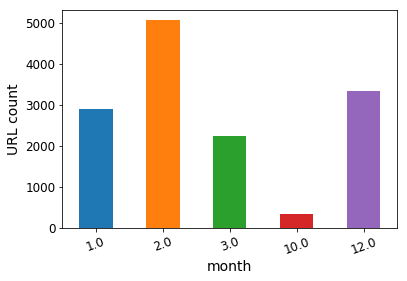

In [14]:
hist_df["date_time"].groupby(hist_df["date_time"].dt.month).count().plot(kind="bar")
plt.xlabel('month', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), rotation=20, fontsize=12) # https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.show()

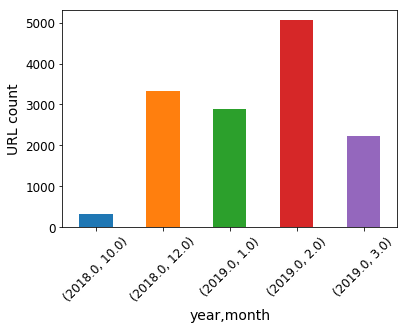

In [15]:
hist_plot = hist_df["date_time"].groupby([hist_df["date_time"].dt.year, hist_df["date_time"].dt.month]).count().plot(kind="bar")
plt.xlabel('year,month', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), rotation=45, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.show()

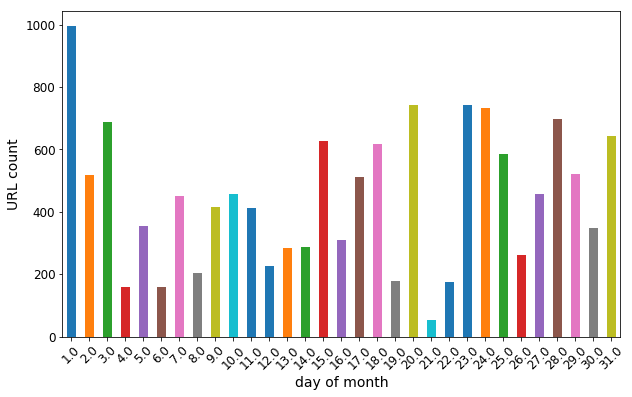

In [16]:
fig = plt.figure(figsize=(10,6))
#plt.figure(figsize=(20,20))

hist_df["date_time"].groupby(hist_df["date_time"].dt.day).count().plot(kind="bar")

plt.xlabel('day of month', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), rotation=45, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.show()

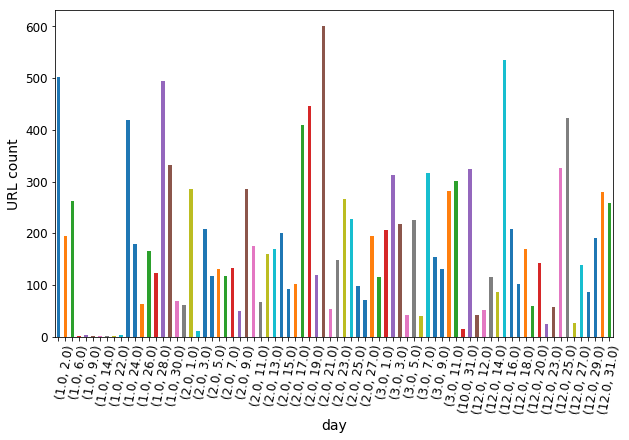

In [17]:
fig = plt.figure(figsize=(10,6))

hist_plot = hist_df["date_time"].groupby([hist_df["date_time"].dt.month, hist_df["date_time"].dt.day]).count().plot(kind="bar")
# https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
for label in hist_plot.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xlabel('day', fontsize=14)
plt.ylabel('URL count', fontsize=14)

plt.setp(plt.gca().get_xticklabels(), rotation=80, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)

plt.show()

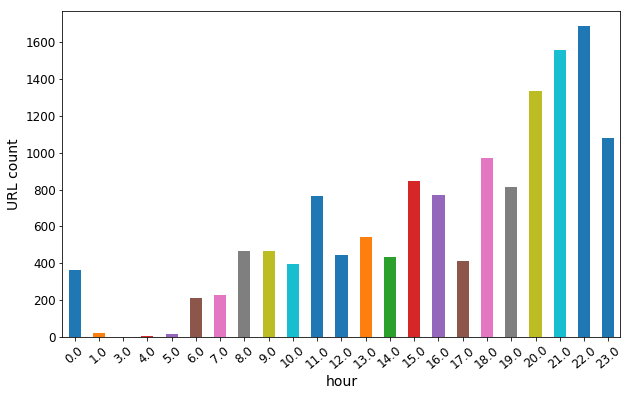

In [18]:
fig = plt.figure(figsize=(10,6))

hist_df["date_time"].groupby(hist_df["date_time"].dt.hour).count().plot(kind="bar")
plt.xlabel('hour', fontsize=14)
plt.ylabel('URL count', fontsize=14)

plt.setp(plt.gca().get_xticklabels(), rotation=40, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)


plt.show()